In [1]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


2024-06-14 18:10:22.653159: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 18:10:22.786284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 18:10:22.786346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 18:10:22.808358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 18:10:22.856526: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 18:10:22.857609: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# Load data from file. Each line must have the format:
# <label> <feature1> <feature2> ... <featureN>

def load_data(filename='data/data_tp1'):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0].astype(int)
    return X, y

In [3]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def build_models(units):
    """
    Build models with a single hidden layer and a given number of units.
    """
    models = []
    for unit in units:
        model = keras.Sequential()
        model.add(keras.layers.InputLayer(input_shape=(784,)))
        model.add(keras.layers.Dense(unit, activation='sigmoid'))
        model.add(keras.layers.Dense(10, activation='softmax'))
        models.append(model)
    return models


In [10]:
units_in_hidden_layers = [25, 50, 100]
learning_rates = [.01, .5, 1, 10]
gd_types = {X_train.size: 'Gradient Descent', 1:'Stochastic Gradient Descent', 10: 'Mini-Batch ', 50: 'Mini-Batch'}

Epoch 1/25
1/1 [==============================] - 0s 366ms/step - loss: 2.5265 - accuracy: 0.1135 - val_loss: 2.5279 - val_accuracy: 0.1110
Epoch 2/25
1/1 [==============================] - 0s 28ms/step - loss: 2.4877 - accuracy: 0.1208 - val_loss: 2.4957 - val_accuracy: 0.1110
Epoch 3/25
1/1 [==============================] - 0s 34ms/step - loss: 2.4543 - accuracy: 0.1245 - val_loss: 2.4611 - val_accuracy: 0.1130
Epoch 4/25
1/1 [==============================] - 0s 31ms/step - loss: 2.4192 - accuracy: 0.1335 - val_loss: 2.4260 - val_accuracy: 0.1200
Epoch 5/25
1/1 [==============================] - 0s 28ms/step - loss: 2.3884 - accuracy: 0.1402 - val_loss: 2.3944 - val_accuracy: 0.1260
Epoch 6/25
1/1 [==============================] - 0s 27ms/step - loss: 2.3541 - accuracy: 0.1475 - val_loss: 2.3636 - val_accuracy: 0.1290
Epoch 7/25
1/1 [==============================] - 0s 34ms/step - loss: 2.3205 - accuracy: 0.1538 - val_loss: 2.3378 - val_accuracy: 0.1400
Epoch 8/25
1/1 [==========

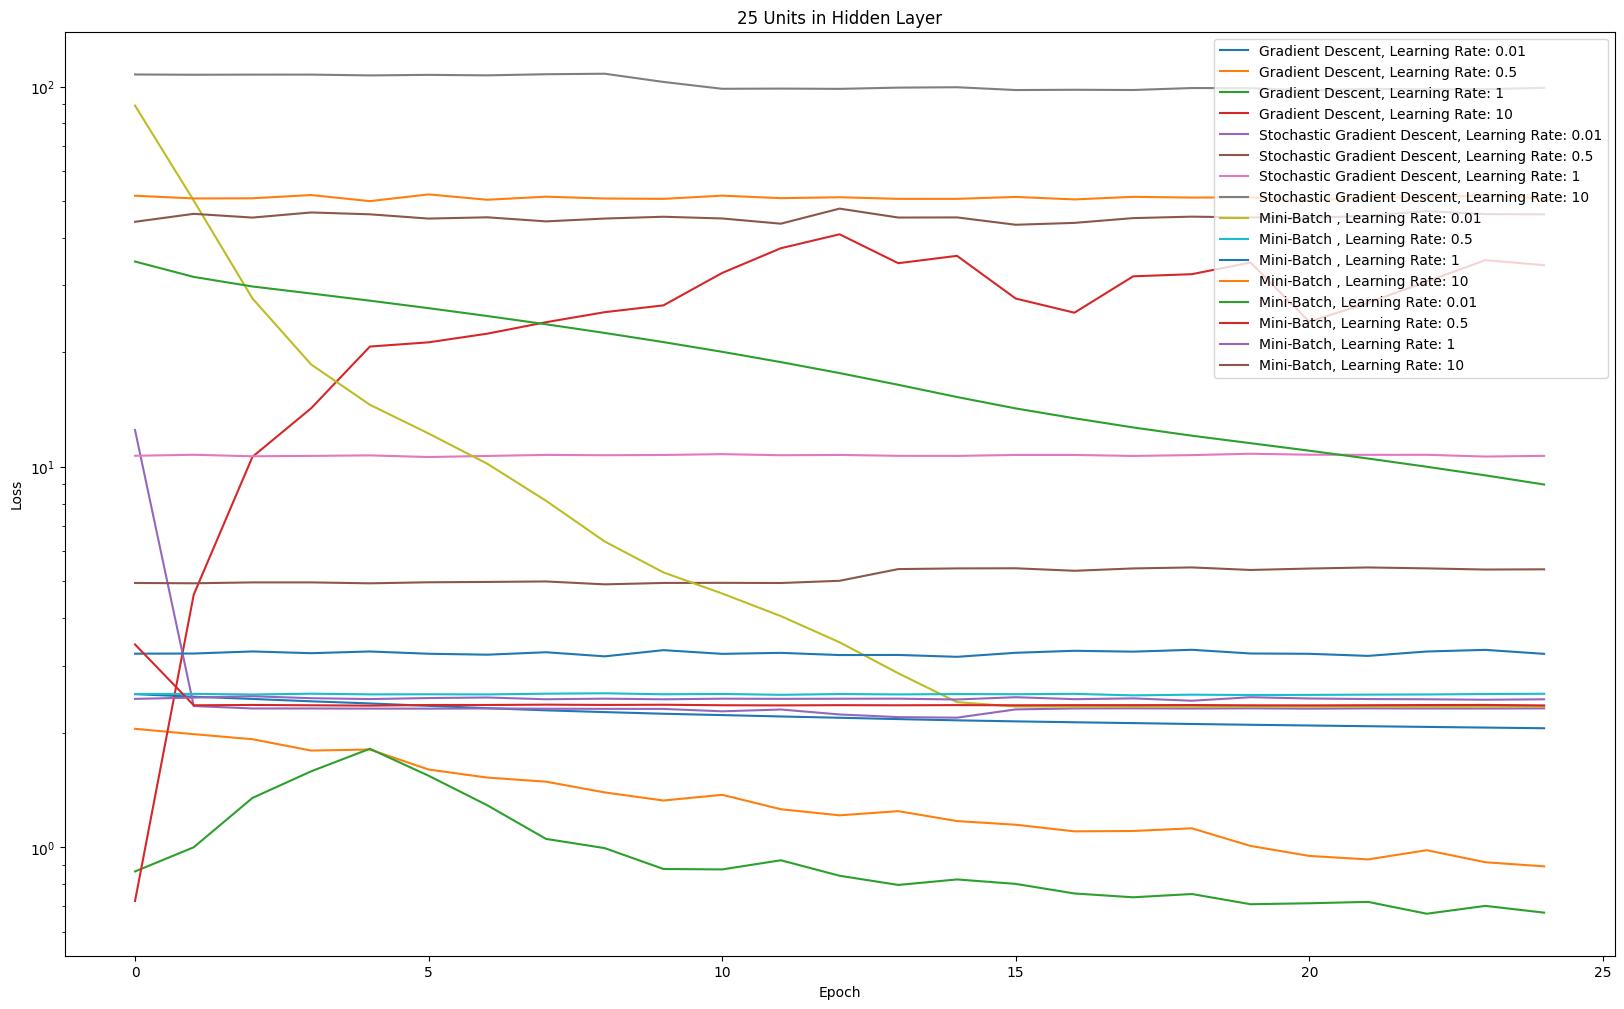

In [13]:
models = build_models(units_in_hidden_layers)

model = models[0]

plt.figure(figsize=(20, 12))

for gd_type in gd_types:
    for lr in learning_rates:
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=25, batch_size=gd_type, validation_data=(X_test, y_test))
        plt.plot(history.history['loss'], label=f'{gd_types[gd_type]}, Learning Rate: {lr}')

plt.title("25 Units in Hidden Layer - Log Scale")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

plt.show()
